# Question:-

#### Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#### Data Description :
##### Undergrad : person is under graduated or not
##### Marital.Status : marital status of a person
##### Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
##### Work Experience : Work experience of an individual person
##### Urban : Whether that person belongs to urban area or not



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.dpi'] =(150)
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Decision%20Trees/Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Basic EDA

In [3]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


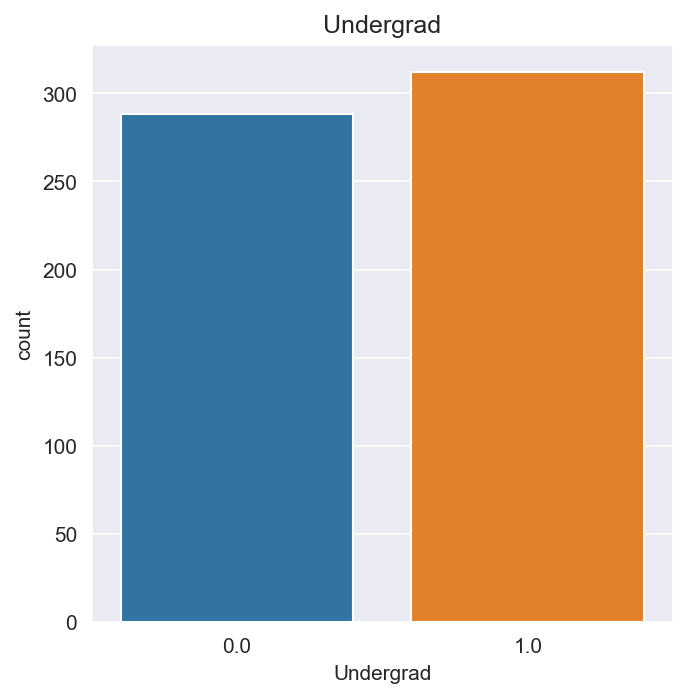

In [49]:
sns.countplot(x='Undergrad',data=df)
plt.title('Undergrad')
plt.rcParams['figure.figsize'] =(5,5)
sns.set_style('darkgrid')

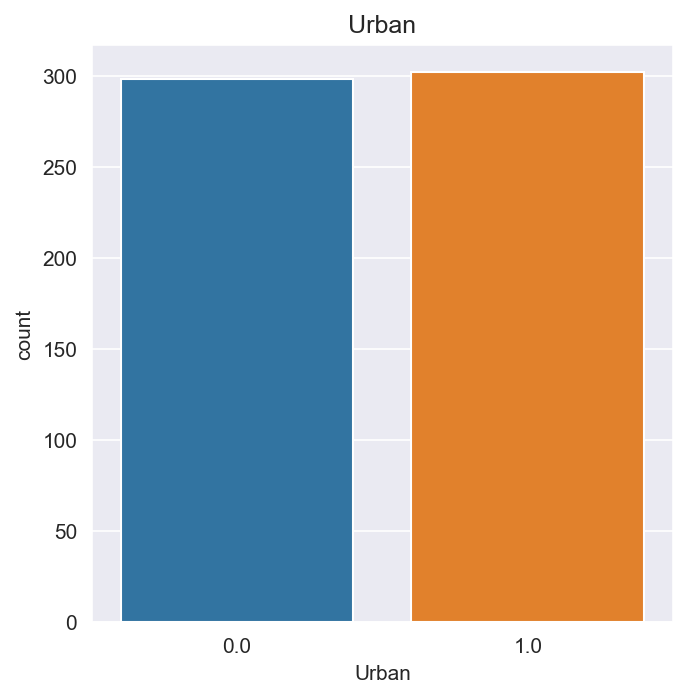

In [46]:
sns.countplot(df['Urban'])
plt.title('Urban')
plt.rcParams['figure.figsize'] =(5,5)
sns.set_style('darkgrid')

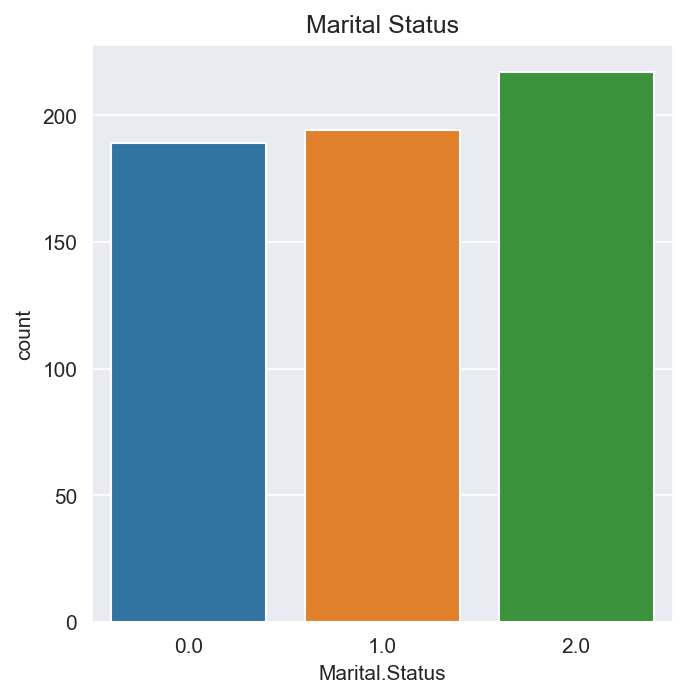

In [42]:
sns.countplot(df['Marital.Status'])
plt.title('Marital Status')
plt.rcParams['figure.figsize'] =(5,5)
sns.set_style('darkgrid')

## Encoding 

In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
oe = OrdinalEncoder()

In [7]:
df_cat_col = df.select_dtypes([object]).columns
df_cat_col

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [8]:
df[df_cat_col] = oe.fit_transform(df[df_cat_col])

In [9]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,2.0,68833,50047,10,1.0
1,1.0,0.0,33700,134075,18,1.0
2,0.0,1.0,36925,160205,30,1.0
3,1.0,2.0,50190,193264,15,1.0
4,0.0,1.0,81002,27533,28,0.0
...,...,...,...,...,...,...
595,1.0,0.0,76340,39492,7,1.0
596,1.0,0.0,69967,55369,2,1.0
597,0.0,0.0,47334,154058,0,1.0
598,1.0,1.0,98592,180083,17,0.0


In [10]:
df['Tax'] = df['Taxable.Income'].map(lambda x : 'Risky' if x <=30000
                                    else 'Good')

In [11]:
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,0.0,2.0,68833,50047,10,1.0,Good
1,1.0,0.0,33700,134075,18,1.0,Good


In [12]:
df.drop(columns='Taxable.Income',inplace=True)

In [13]:
df.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax
0,0.0,2.0,50047,10,1.0,Good
1,1.0,0.0,134075,18,1.0,Good


## Model Buliding

In [14]:
x = df.iloc[:,:-1]
y = df['Tax']

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [16]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [30]:
print(f"Training Accuracy:{dt.score(xtrain,ytrain)}\n Testing Accuracy:{dt.score(xtest,ytest)}")

Training Accuracy:0.7895833333333333
 Testing Accuracy:0.8083333333333333


# Decision Tree Model

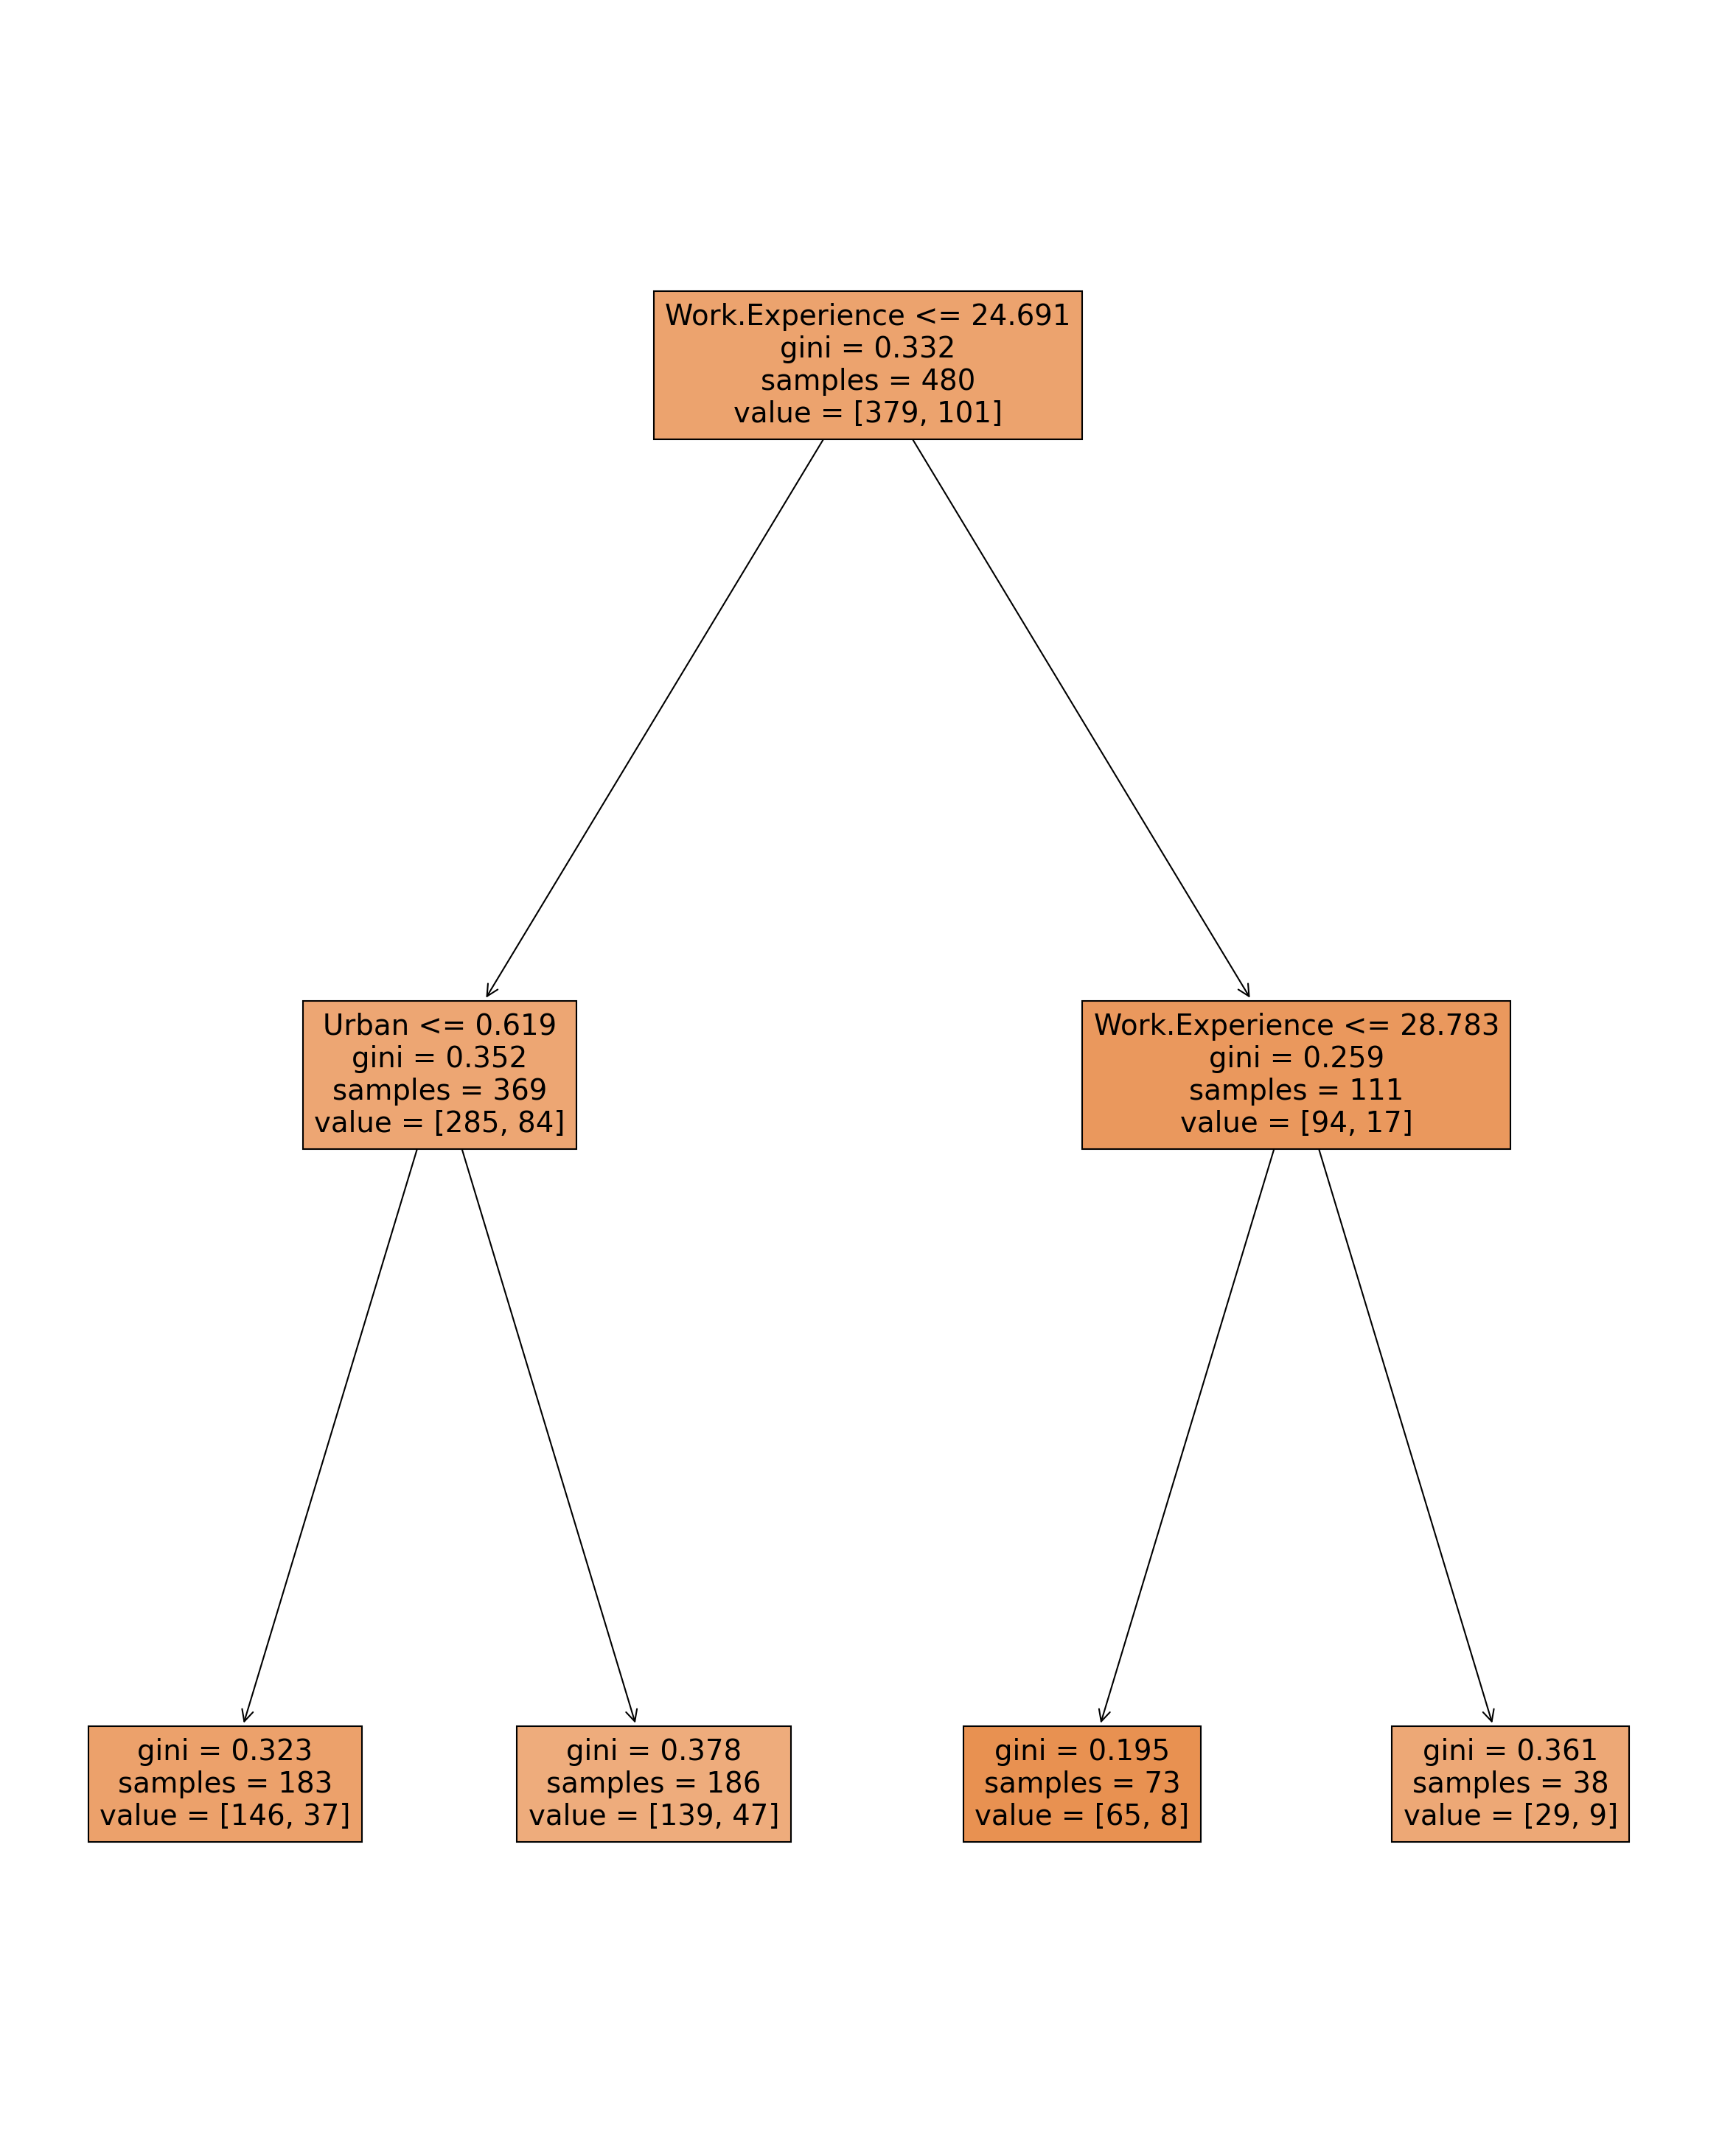

In [31]:
tree.plot_tree(dt, feature_names=x.columns, filled=True)
plt.show()


### Model is not Generalize so we will perform Hyperparameter Tunning

In [19]:
params = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2,3,4,5],
    
}

In [20]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params,verbose=1)


In [21]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [22]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'splitter': 'random'}

In [23]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=2,splitter='random')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [24]:
print(f"Training Accuracy:{dt.score(xtrain,ytrain)}\n Testing Accuracy:{dt.score(xtest,ytest)}")

Training Accuracy:0.7895833333333333
 Testing Accuracy:0.8083333333333333


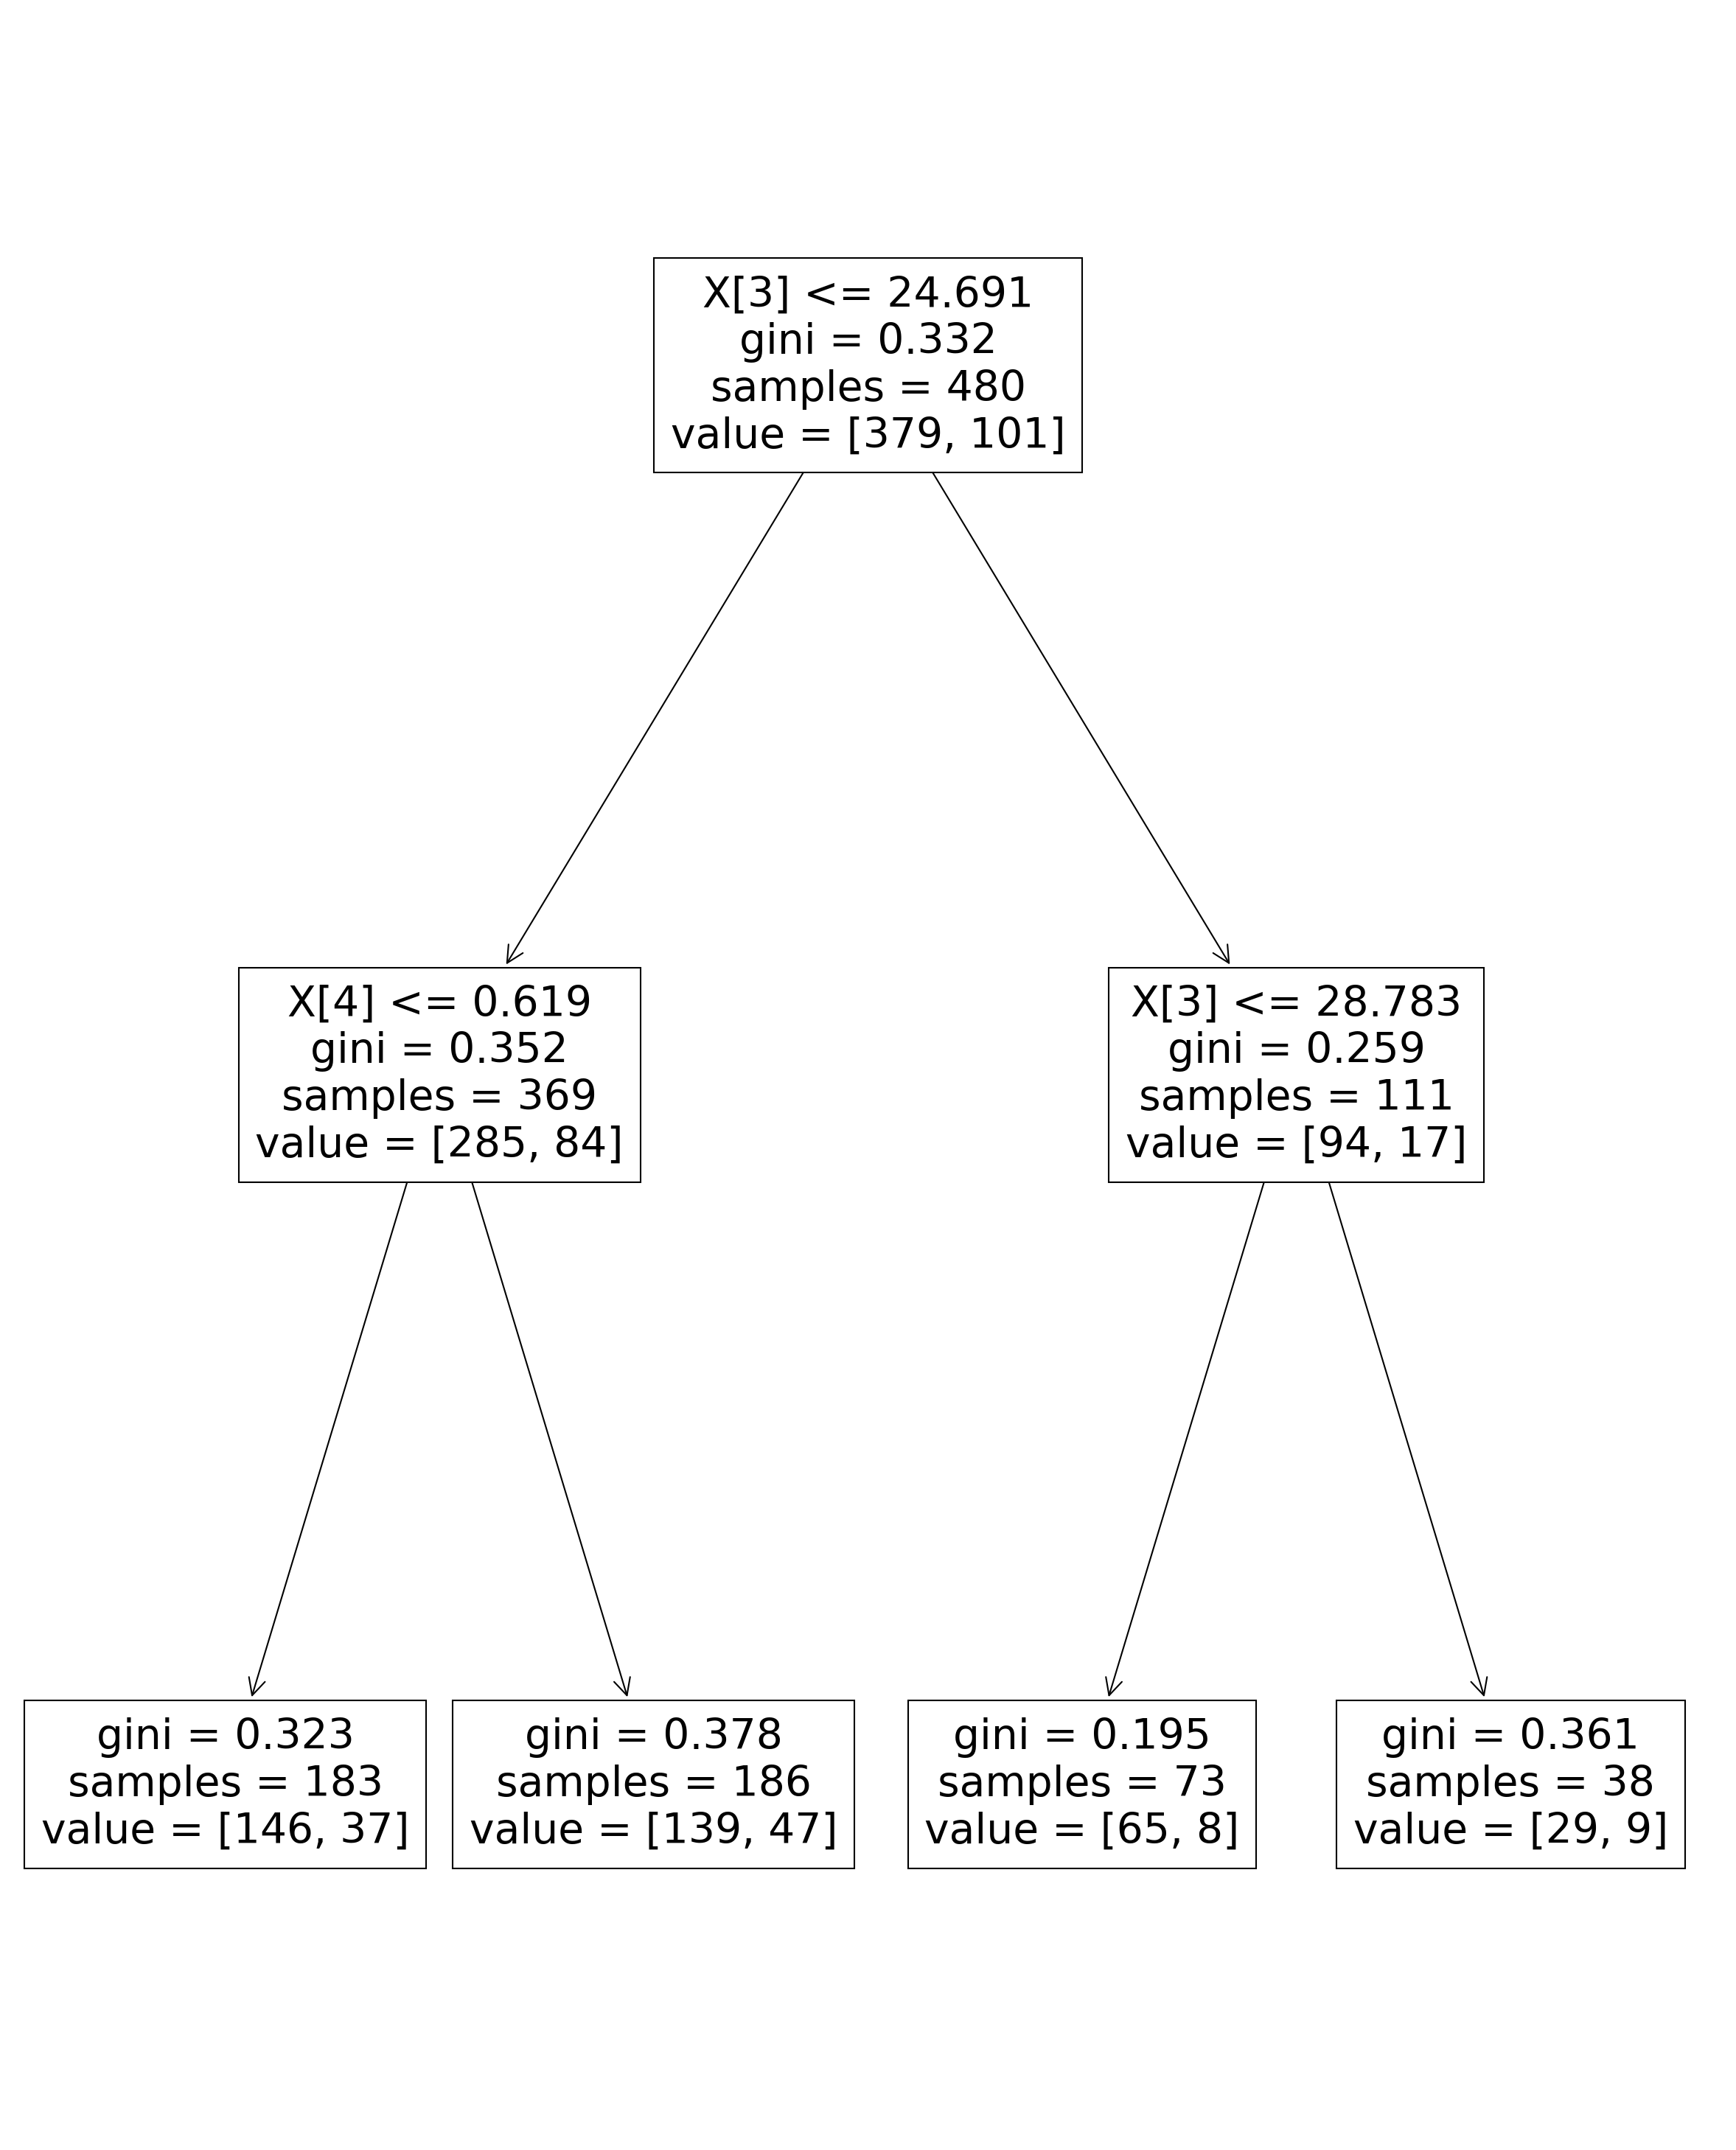

In [32]:
tree.plot_tree(dt)
plt.show()

# Here we have Generalize Model,with Accuracy 
## Training Accuracy:-   78.95%
## Testing Accuracy:-   80.83